# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [10]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [49]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [50]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [51]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [14]:
df_hh_income.shape

(29322, 3)

In [15]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [16]:
df_hh_income.isna()

,Geographic Area,City,Median Income
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29317,False,False,True
29318,False,False,False
29319,False,False,False
29320,False,False,False


In [17]:
# Selecting duplicate rows except last occurrence based on all columns.
duplicate = df_hh_income[df_hh_income.duplicated(keep='last')]
 
print("Duplicate Rows :")

Duplicate Rows :


In [18]:
df_fatalities.shape

(2535, 14)

In [19]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [20]:
df_fatalities.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2531,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2532,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# Selecting duplicate rows except last occurrence based on all columns.
duplicate = df_fatalities[df_fatalities.duplicated(keep='last')]
 
print("Duplicate Rows :")

Duplicate Rows :


In [22]:
df_pct_completed_hs.shape

(29329, 3)

In [23]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [24]:
df_pct_completed_hs.isna()

,Geographic Area,City,percent_completed_hs
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29324,False,False,False
29325,False,False,False
29326,False,False,False
29327,False,False,False


In [25]:
# Selecting duplicate rows except last occurrence based on all columns.
duplicate = df_pct_completed_hs[df_pct_completed_hs.duplicated(keep='last')]
 
print("Duplicate Rows :")

Duplicate Rows :


In [26]:
df_share_race_city.shape

(29268, 7)

In [27]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [28]:
df_share_race_city.isna()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
29263,False,False,False,False,False,False,False
29264,False,False,False,False,False,False,False
29265,False,False,False,False,False,False,False
29266,False,False,False,False,False,False,False


In [29]:
# Selecting duplicate rows except last occurrence based on all columns.
duplicate = df_share_race_city[df_share_race_city.duplicated(keep='last')]
 
print("Duplicate Rows :")

Duplicate Rows :


In [30]:
df_pct_poverty.shape

(29329, 3)

In [31]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [32]:
df_pct_poverty.isna()

,Geographic Area,City,poverty_rate
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29324,False,False,False
29325,False,False,False
29326,False,False,False
29327,False,False,False


In [33]:
# Selecting duplicate rows except last occurrence based on all columns.
duplicate = df_pct_poverty[df_pct_poverty.duplicated(keep='last')]
 
print("Duplicate Rows :")

Duplicate Rows :


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [34]:
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_poverty.isna()

,Geographic Area,City,poverty_rate
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29324,False,False,False
29325,False,False,False
29326,False,False,False
29327,False,False,False


In [35]:
print(f"Any duplicates? {df_pct_poverty.duplicated().values.any()}")

Any duplicates? False


In [36]:
print(f"Any duplicates? {df_fatalities.duplicated().values.any()}")

Any duplicates? False


In [37]:
print(f"Any duplicates? {df_pct_completed_hs.duplicated().values.any()}")

Any duplicates? False


In [38]:
df_share_race_city = df_share_race_city.fillna(0)
df_share_race_city.isna()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
29263,False,False,False,False,False,False,False
29264,False,False,False,False,False,False,False
29265,False,False,False,False,False,False,False
29266,False,False,False,False,False,False,False


In [39]:
print(f"Any duplicates? {df_share_race_city.duplicated().values.any()}")

Any duplicates? False


In [40]:
df_fatalities = df_fatalities.fillna(0)
df_fatalities.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2531,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2532,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_pct_completed_hs.isna()

,Geographic Area,City,percent_completed_hs
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29324,False,False,False
29325,False,False,False
29326,False,False,False
29327,False,False,False


In [42]:
print(f"Any duplicates? {df_hh_income.duplicated().values.any()}")

Any duplicates? False


In [43]:
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna()

,Geographic Area,City,Median Income
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
29317,False,False,False
29318,False,False,False
29319,False,False,False
29320,False,False,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [4]:
import pandas as pd
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")

In [5]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [6]:
df_pct_poverty_state = df_pct_poverty.rename(columns={'Geographic Area': 'State'})
df_pct_poverty_state.head()

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [12]:
grouped_poverty_state = df_pct_poverty_state.groupby("State")
grouped_poverty_state.head()

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29125,WY,Afton town,8.2
29126,WY,Albany CDP,0
29127,WY,Albin town,29.6
29128,WY,Alcova CDP,-


In [16]:
city_counts = grouped_poverty_state["City"].nunique
city_counts

<bound method SeriesGroupBy.nunique of <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000266C6682FD0>>

In [7]:
# Creating the dataset
counts = df_pct_poverty_state.value_counts(df_pct_poverty_state["State"])
counts

State
PA    1762
TX    1747
CA    1522
IL    1368
OH    1215
NY    1196
MO    1033
IA    1008
FL     918
MN     903
WI     777
OK     743
NC     739
MI     692
IN     680
KS     672
GA     627
WA     627
VA     593
AL     585
NE     580
NJ     545
AR     541
KY     540
MD     518
LA     474
CO     458
AZ     451
NM     443
TN     430
WV     405
ND     401
SC     396
SD     391
OR     377
MT     365
MS     362
AK     355
UT     325
MA     246
ID     227
WY     204
HI     151
CT     144
NV     131
ME     130
VT     121
NH      97
DE      77
RI      36
DC       1
dtype: int64

In [8]:
state_counts = pd.DataFrame(counts)
state_counts

,0
State,
PA,1762
TX,1747
CA,1522
IL,1368
OH,1215
NY,1196
MO,1033
IA,1008
FL,918


In [9]:
state_counts=state_counts.rename(columns = {0:'Poverty_Percent'})
state_counts

,Poverty_Percent
State,
PA,1762
TX,1747
CA,1522
IL,1368
OH,1215
NY,1196
MO,1033
IA,1008
FL,918


In [70]:
state_counts['Poverty_%'] = state_counts['Poverty_%'].str.replace('%', r'', regex=True).astype(float)
state_counts.head()

,Poverty_%
State,
PA,"1,762.00"
TX,"1,747.00"
CA,"1,522.00"
IL,"1,368.00"
OH,"1,215.00"


In [71]:
state_counts['Total'] = state_counts['Poverty_%'].div(100)
state_counts 

,Poverty_%,Total
State,,
PA,"1,762.00",17.62
TX,"1,747.00",17.47
CA,"1,522.00",15.22
IL,"1,368.00",13.68
OH,"1,215.00",12.15
NY,"1,196.00",11.96
MO,"1,033.00",10.33
IA,"1,008.00",10.08
FL,918.00,9.18


In [74]:
state_counts = state_counts.drop(columns=['Poverty_%'])
state_counts.head

<bound method NDFrame.head of        Total
State       
PA     17.62
TX     17.47
CA     15.22
IL     13.68
OH     12.15
NY     11.96
MO     10.33
IA     10.08
FL      9.18
MN      9.03
WI      7.77
OK      7.43
NC      7.39
MI      6.92
IN      6.80
KS      6.72
GA      6.27
WA      6.27
VA      5.93
AL      5.85
NE      5.80
NJ      5.45
AR      5.41
KY      5.40
MD      5.18
LA      4.74
CO      4.58
AZ      4.51
NM      4.43
TN      4.30
WV      4.05
ND      4.01
SC      3.96
SD      3.91
OR      3.77
MT      3.65
MS      3.62
AK      3.55
UT      3.25
MA      2.46
ID      2.27
WY      2.04
HI      1.51
CT      1.44
NV      1.31
ME      1.30
VT      1.21
NH      0.97
DE      0.77
RI      0.36
DC      0.01>

In [75]:
state_counts=state_counts.rename(columns = {'Total':'Poverty_%'})
state_counts.head()

,Poverty_%
State,
PA,17.62
TX,17.47
CA,15.22
IL,13.68
OH,12.15


<Figure size 1000x500 with 0 Axes>

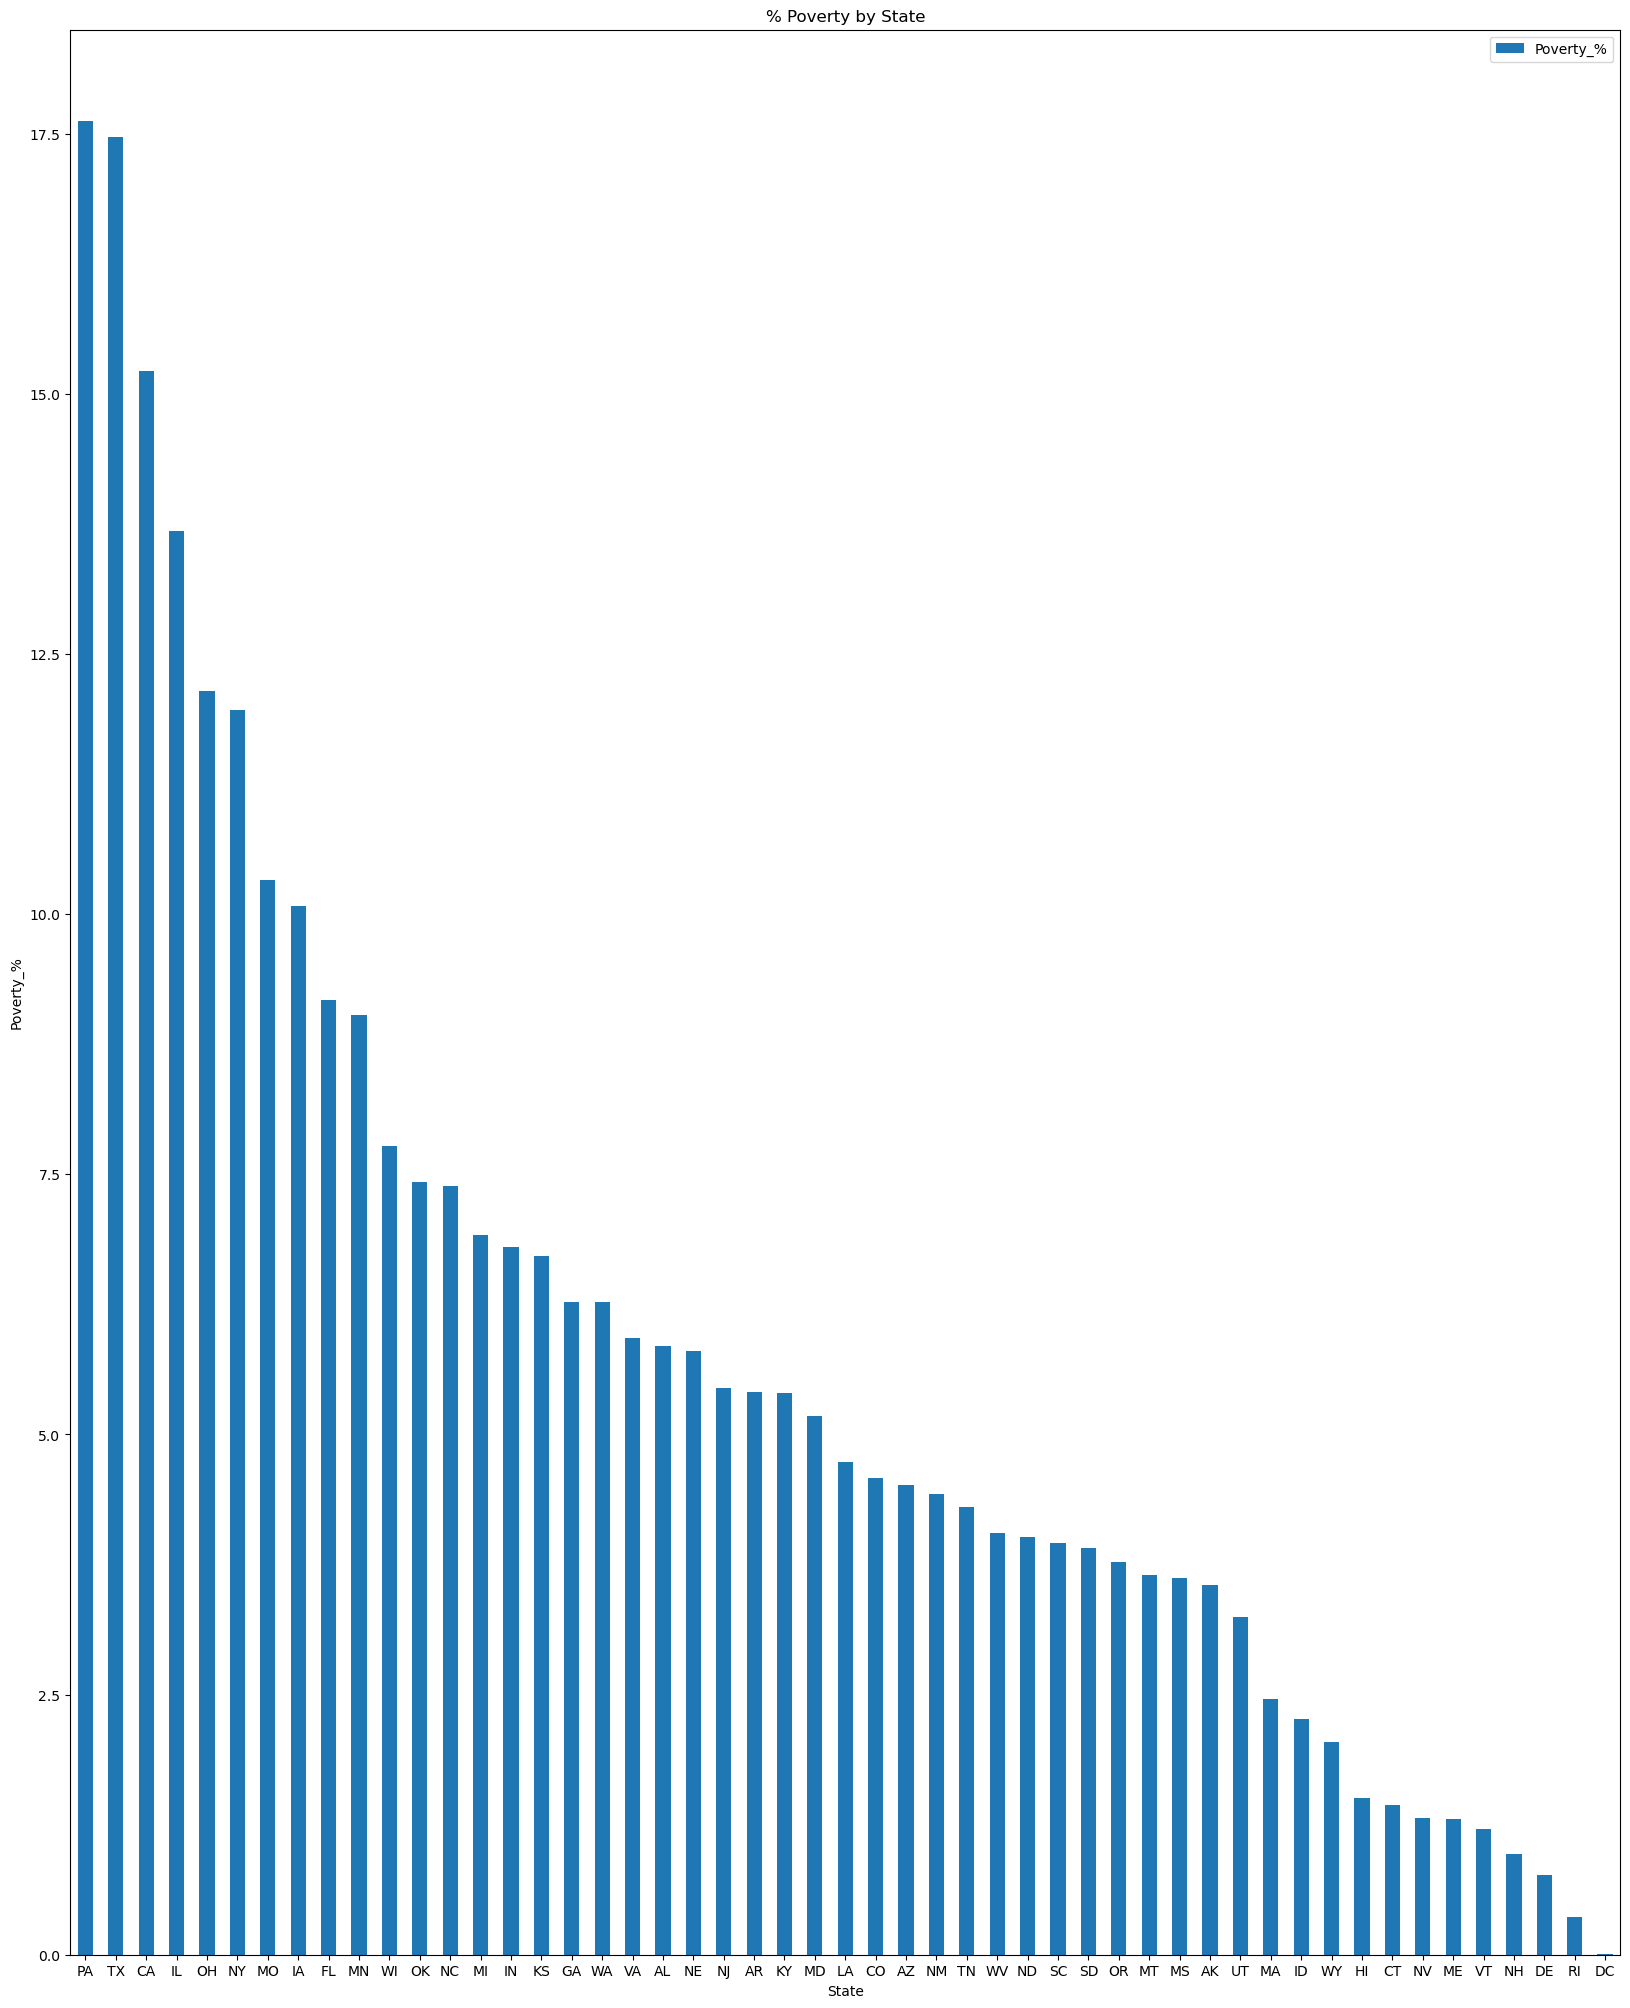

In [77]:
# Bar chart poverty rate by US state
import numpy as np
import matplotlib.pyplot as plt 


fig = plt.figure(figsize = (10, 5))

# Creating the bar plot

state_counts.plot(kind='bar', rot=0, figsize=(20, 25))
plt.xlabel('State')
plt.ylabel('Poverty_%')
plt.title('% Poverty by State')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [84]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [85]:
completed_hs_state = df_pct_completed_hs.rename(columns={'Geographic Area': 'State'})
completed_hs_state.head()

,State,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [86]:
# Creating the dataset 
completed_hs_state_count = completed_hs_state.value_counts(completed_hs_state["State"])
completed_hs_state_count.head()

State
PA    1762
TX    1747
CA    1522
IL    1368
OH    1215
dtype: int64

In [87]:
hs_grad_rates = pd.DataFrame(completed_hs_state)
hs_grad_rates

,State,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [88]:
hs_state_count = pd.DataFrame(completed_hs_state_count)
hs_state_count.head() 

,0
State,
PA,1762
TX,1747
CA,1522
IL,1368
OH,1215


In [93]:
hs_state_count=hs_state_count.rename(columns = {'Poverty_%':'Graduated_HS_%'})
hs_state_count.head()

,Graduated_HS_%
State,
PA,17.62
TX,17.47
CA,15.22
IL,13.68
OH,12.15


<Figure size 1000x500 with 0 Axes>

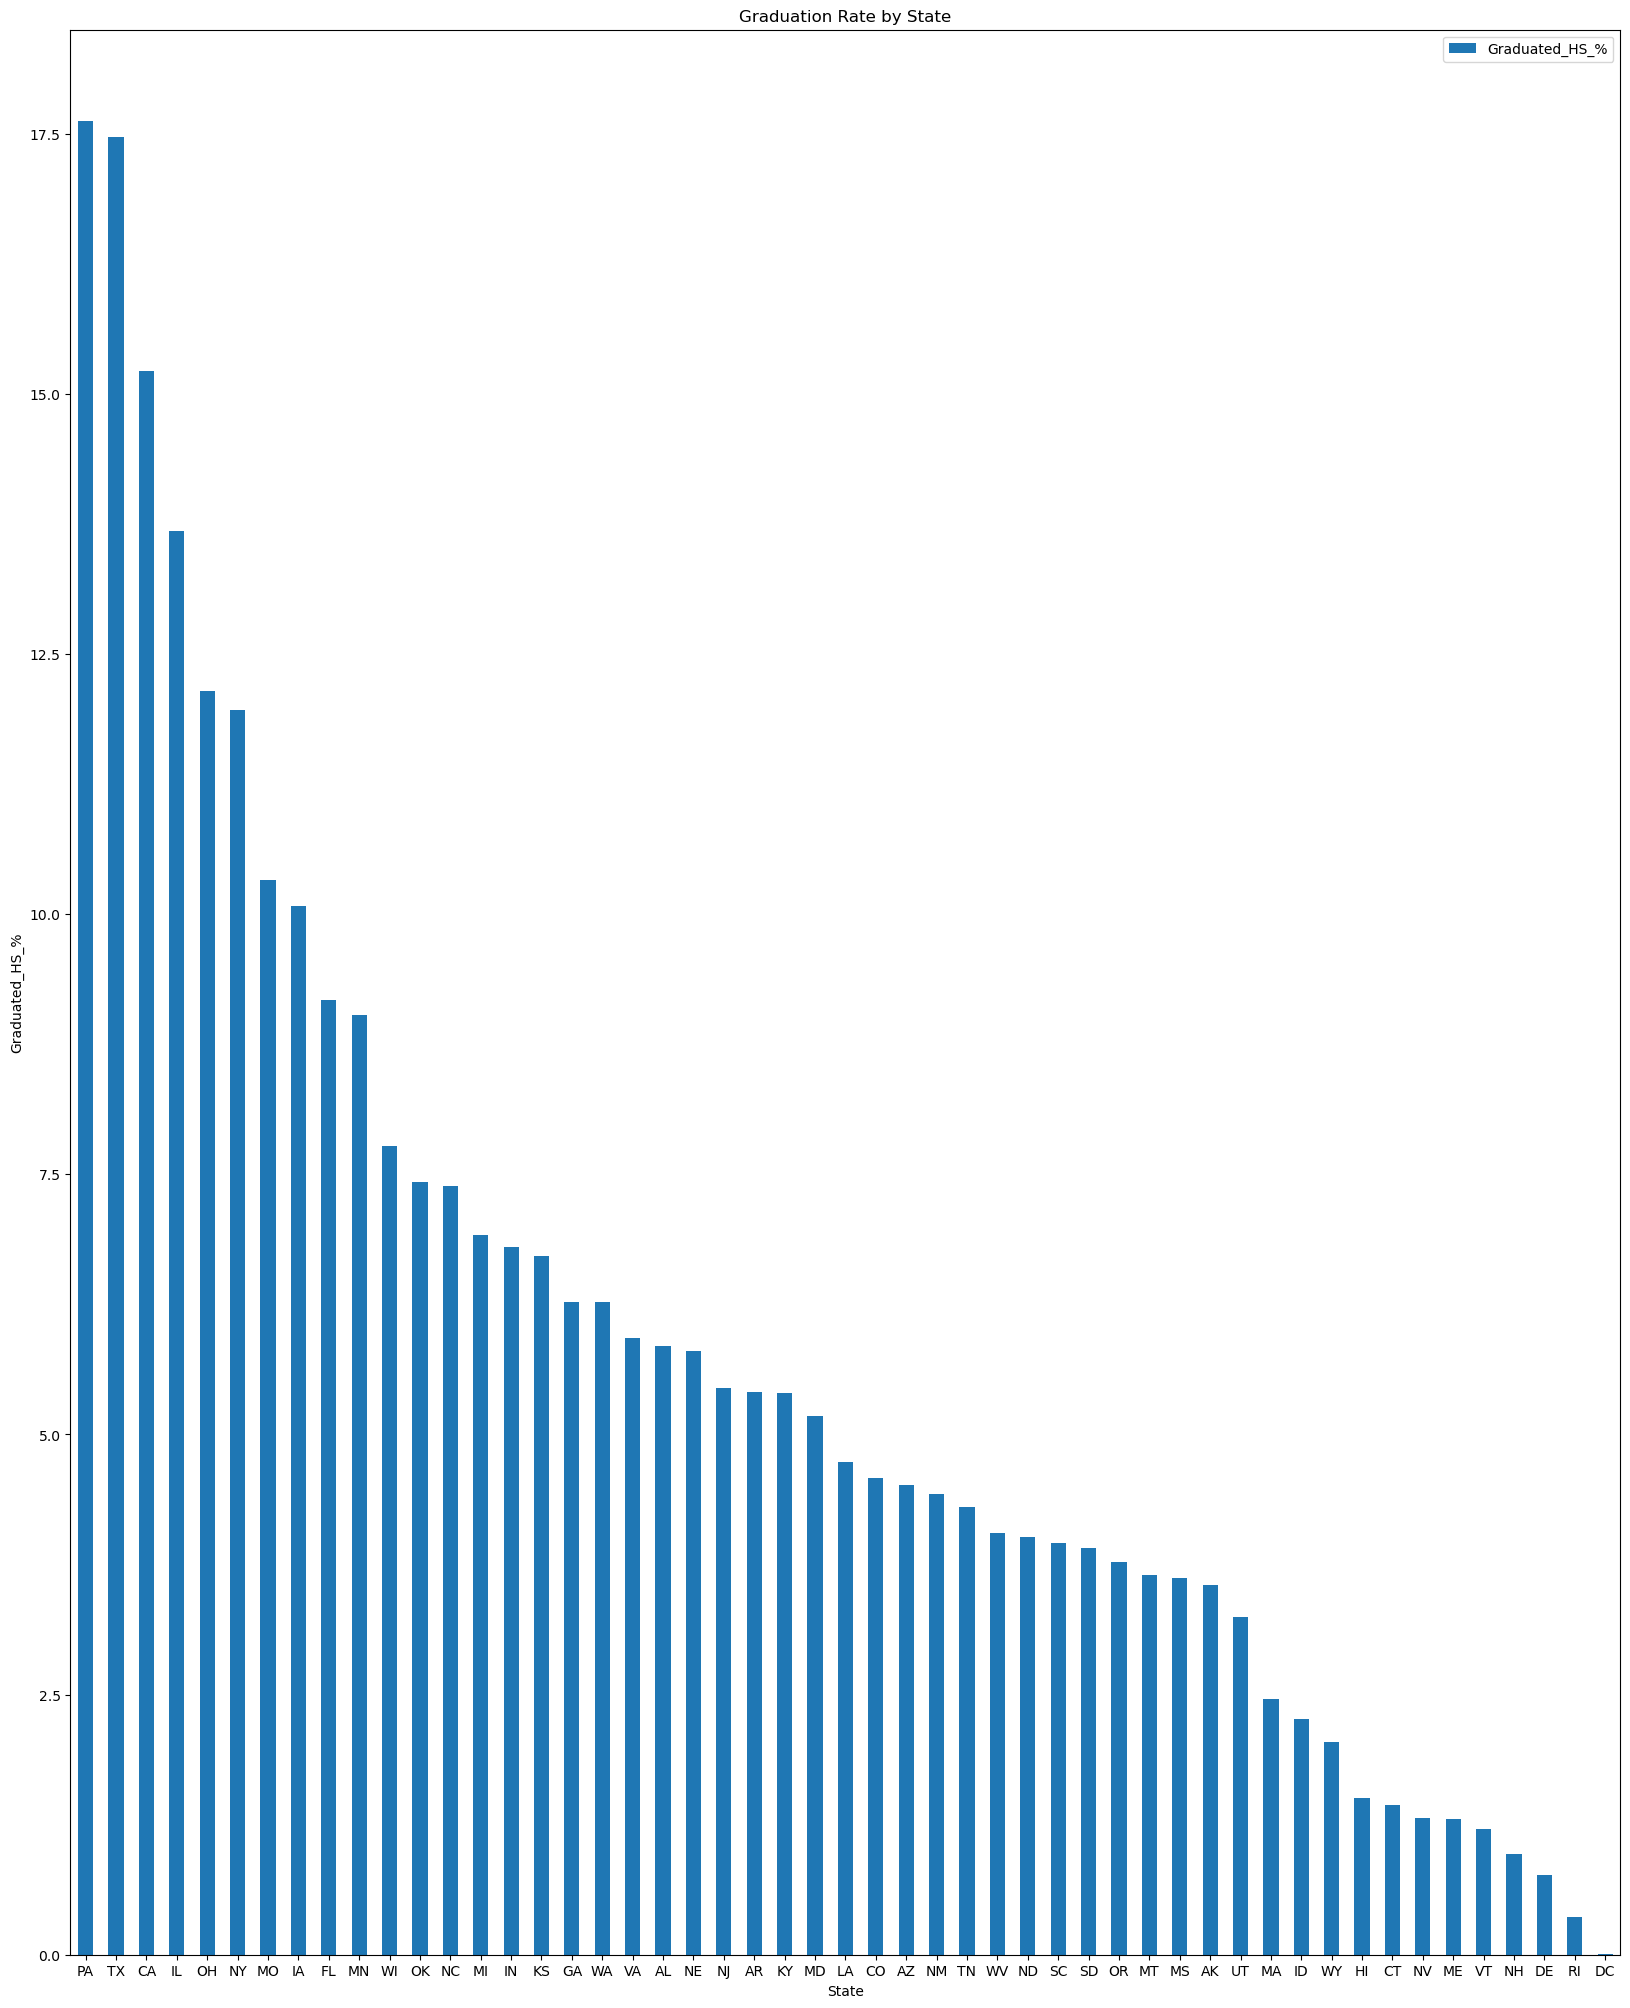

In [94]:
# Bar chart high school graduation rate by US state
import numpy as np
import matplotlib.pyplot as plt 

# Creating the dataset  try value_counts()
#Maybe have to create a state and count columns to chart them? 
fig = plt.figure(figsize = (10, 5))


# Creating the bar plot

hs_state_count.plot(kind='bar', rot=0, figsize=(20, 25))
plt.xlabel('State')
plt.ylabel('Graduated_HS_%')
plt.title('Graduation Rate by State')
plt.show()

# Visualize the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the ratios of poverty and high school graduation move together.  

In [97]:
# First sort them by state by alpha
hs_state_count_sorted = hs_state_count.sort_values(by="State")
hs_state_count_sorted.head() 

,Graduated_HS_%
State,
AK,3.55
AL,5.85
AR,5.41
AZ,4.51
CA,15.22


In [98]:
state_count_sorted = state_counts.sort_values(by="State")
state_count_sorted.head() 

,Poverty_%
State,
AK,3.55
AL,5.85
AR,5.41
AZ,4.51
CA,15.22


In [807]:
# Poverty ratio
only_poverty_rates.head()

,State,Poverty_Rates
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371


In [808]:
# Merge the last two dataframes, the graduation rate, state_count_sorted and the poverty ratio, only_poverty_rates
rates_poverty_graduation = pd.merge(hs_grad_percent, only_poverty_rates, on="State", how="outer")
rates_poverty_graduation.head()


,State,%_completed_hs,Poverty_Rates
0,AK,80.098028,18.678592
1,AL,80.163419,20.611795
2,AR,79.949538,22.963216
3,AZ,79.218182,25.268071
4,CA,80.824639,16.888371


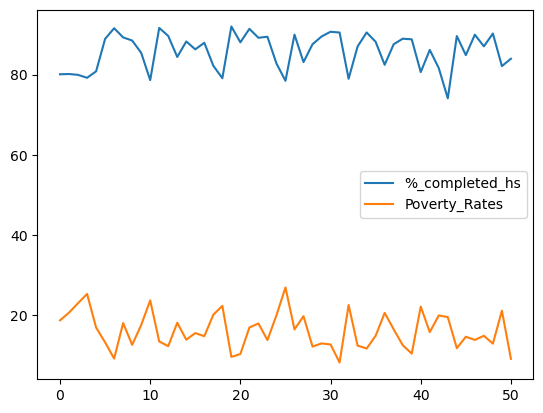

In [815]:
# Rates of Poverty vs. High School Graduation Rates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ax = rates_poverty_graduation.plot.line()
# Add legend
plt.legend()

# Display the graph
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

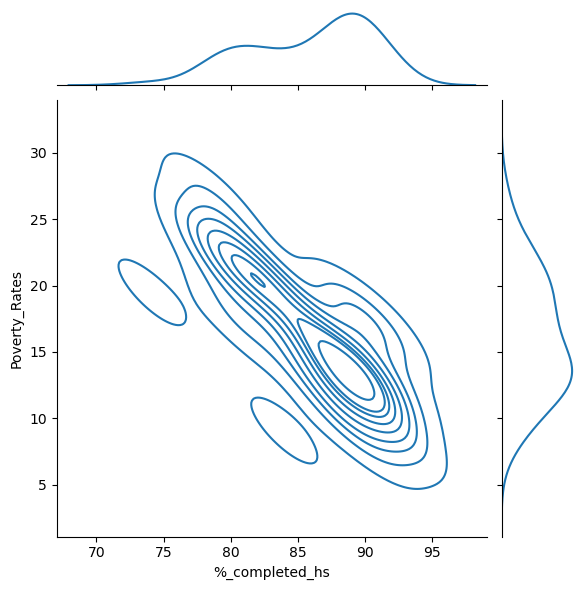

In [823]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.jointplot(x="%_completed_hs", y="Poverty_Rates", data=rates_poverty_graduation, kind='kde')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


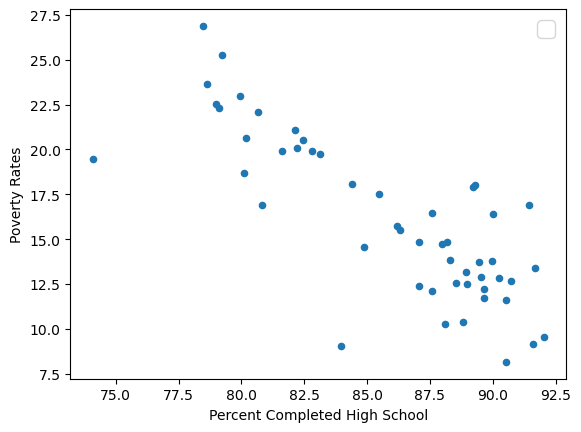

In [821]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

rates_poverty_graduation.plot.scatter(x="%_completed_hs", y="Poverty_Rates")

plt.legend(loc='best', fontsize=16)
plt.xlabel('Percent Completed High School')
plt.ylabel('Poverty Rates')

plt.show();

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

High School Graduation Ratio

In [19]:
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [20]:
completed_hs_state = df_pct_completed_hs.rename(columns={'Geographic Area': 'State'})
completed_hs_state.head()

,State,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [774]:
completed_hs_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [775]:
completed_hs_state = pd.DataFrame(completed_hs_state)
completed_hs_state.head()

,State,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [778]:
completed_hs_state["percent_completed_hs"] = pd.to_numeric(completed_hs_state["percent_completed_hs"], errors="coerce")
completed_hs_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [779]:
completed_hs_count = completed_hs_state.groupby(["State"])["percent_completed_hs"].sum().reset_index()
completed_hs_count.head()

,State,percent_completed_hs
0,AK,28434.8
1,AL,46895.6
2,AR,43252.7
3,AZ,35727.4
4,CA,123015.1


In [768]:
# These are the number of unique cities by state
# group = df.groupby('STATE')['CITY'].count()
city_counts_hs = completed_hs_state.groupby("State")["City"].count()
city_counts_hs.head()

State
AK     355
AL     585
AR     541
AZ     451
CA    1522
Name: City, dtype: int64

In [767]:
city_counts_hs = pd.DataFrame(city_counts_hs)
city_counts_hs.head()

,City
State,
AK,355
AL,585
AR,541
AZ,451
CA,1522


In [758]:
city_counts_hs = city_counts_hs.rename(columns={"City": "Counts"})
city_counts_hs.head()

,Counts
State,
AK,355
AL,585
AR,541
AZ,451
CA,1522


In [781]:
# Now I need to merge city_counts_hs with hs_state_count_sorted with state as the pivot
hs_graduation = pd.merge(city_counts_hs, completed_hs_count, on="State", how="outer")
hs_graduation.head()

,State,City,percent_completed_hs
0,AK,355,28434.8
1,AL,585,46895.6
2,AR,541,43252.7
3,AZ,451,35727.4
4,CA,1522,123015.1


In [787]:
hs_graduation["%_completed_hs"] = hs_graduation["percent_completed_hs"] / hs_graduation["City"]
hs_graduation.head()

,State,City,percent_completed_hs,%_completed_hs
0,AK,355,28434.8,80.098028
1,AL,585,46895.6,80.163419
2,AR,541,43252.7,79.949538
3,AZ,451,35727.4,79.218182
4,CA,1522,123015.1,80.824639


In [795]:
hs_grad_percent = hs_graduation.drop("percent_completed_hs", axis=1)
hs_grad_percent.head()


,State,City,%_completed_hs
0,AK,355,80.098028
1,AL,585,80.163419
2,AR,541,79.949538
3,AZ,451,79.218182
4,CA,1522,80.824639


In [796]:
# This is the completed high school graduation ratio
hs_grad_percent = hs_grad_percent.drop("City", axis=1)
hs_grad_percent.head()

,State,%_completed_hs
0,AK,80.098028
1,AL,80.163419
2,AR,79.949538
3,AZ,79.218182
4,CA,80.824639


In [802]:
# Poverty ratio
only_poverty_rates.head()

,State,Poverty_Rates
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371


In [803]:
# Now I need to merge the two dataframes 
rates_poverty_graduation = pd.merge(hs_grad_percent, only_poverty_rates, on="State", how="outer")
rates_poverty_graduation.head()

,State,%_completed_hs,Poverty_Rates
0,AK,80.098028,18.678592
1,AL,80.163419,20.611795
2,AR,79.949538,22.963216
3,AZ,79.218182,25.268071
4,CA,80.824639,16.888371


Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

c:\Users\LauraKhadas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



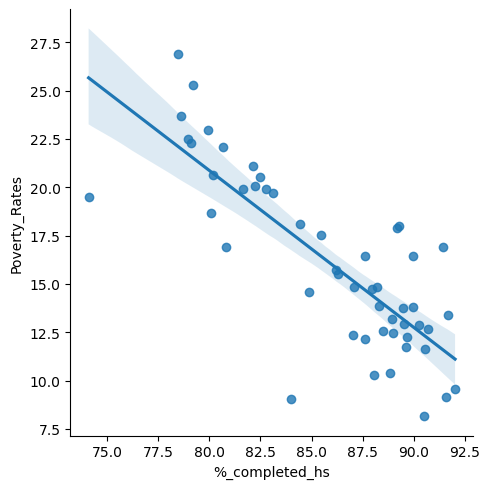

In [804]:
# Seaborns' .lmplot()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(data=rates_poverty_graduation, x="%_completed_hs", y="Poverty_Rates")
plt.show();

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [337]:
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_share_race_city.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [344]:
# Copying the dataframe into a test dataframe
city_counts = df_share_race_city
city_counts.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [345]:
# Make sure this is a pandas dataframe
df_city_counts = pd.DataFrame(city_counts)
df_city_counts.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [347]:
# Rename the Geographic Area column to a State column
df_city_counts.rename(columns={"Geographic area": "State"}, inplace=True)
df_city_counts.head()

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [369]:
df_city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [379]:
df_city_counts = pd.DataFrame(df_city_counts)
df_city_counts.head()

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [380]:
df_city_counts.dtypes

State                    object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object

In [373]:
# Converting column objects to floats
df_city_counts["share_asian"] = df_city_counts["share_asian"].astype(str).astype(float)
df_city_counts.info()

TypeError: 'numpy.dtype[object_]' object is not callable

In [388]:
# Converting column objects to floats
df_city_counts["share_asian"] = pd.to_numeric(df_city_counts["share_asian"], errors="coerce")
df_city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  object 
 3   share_black            29268 non-null  object 
 4   share_native_american  29268 non-null  object 
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29268 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [391]:
df_city_counts["share_white"] = pd.to_numeric(df_city_counts["share_white"], errors="coerce")
df_city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29268 non-null  object 
 4   share_native_american  29268 non-null  object 
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29268 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [392]:
df_city_counts["share_black"] = pd.to_numeric(df_city_counts["share_black"], errors="coerce")
df_city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29268 non-null  object 
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29268 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.6+ MB


In [393]:
df_city_counts["share_native_american"] = pd.to_numeric(df_city_counts["share_native_american"], errors="coerce")
df_city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29268 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


In [394]:
df_city_counts["share_hispanic"] = pd.to_numeric(df_city_counts["share_hispanic"], errors="coerce")
df_city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [396]:
df_city_counts = pd.DataFrame(df_city_counts)
df_city_counts

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,13.2,86.5,0.0,0.0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0.0,0.0,2.1,0.0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0.0,0.0,0.0,4.0


In [397]:
# Count the number of unique cities by state
unique_cities = df_city_counts.groupby("State")["City"].nunique()
unique_cities.head()

State
AK     355
AL     578
AR     541
AZ     451
CA    1523
Name: City, dtype: int64

In [398]:
# Turn unique_cities into a dataframe
df_unique_cities = pd.DataFrame(unique_cities)
df_unique_cities.head()

,City
State,
AK,355
AL,578
AR,541
AZ,451
CA,1523


In [399]:
# Rename the City column to a City_count column
df_unique_cities.rename(columns={"City": "City_count"}, inplace=True)
df_unique_cities.head()

,City_count
State,
AK,355
AL,578
AR,541
AZ,451
CA,1523


In [400]:
# Now there needs to be a series that can be turned into a column in df_unique_cities of the sum of the shares
# Use df.groupby('a').count()
shares_sum = df_city_counts.groupby("State").sum()
shares_sum.head()


C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_22264\2996414940.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,share_white,share_black,share_native_american,share_asian,share_hispanic
State,,,,,
AK,16068.8,199.7,16144.4,488.7,756.5
AL,41909.2,13480.3,381.1,277.3,1722.5
AR,42441.2,8816.6,411.1,258.1,2311.7
AZ,27028.0,430.5,12894.0,327.7,9085.2
CA,108949.3,4081.1,2612.2,8441.4,44949.2


In [401]:
shares_sum_result = pd.merge(shares_sum, df_unique_cities, on="State")
shares_sum_result.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic,City_count
State,,,,,,
AK,16068.8,199.7,16144.4,488.7,756.5,355
AL,41909.2,13480.3,381.1,277.3,1722.5,578
AR,42441.2,8816.6,411.1,258.1,2311.7,541
AZ,27028.0,430.5,12894.0,327.7,9085.2,451
CA,108949.3,4081.1,2612.2,8441.4,44949.2,1523


In [402]:
df_shares_sum_result = pd.DataFrame(shares_sum_result)
df_shares_sum_result.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic,City_count
State,,,,,,
AK,16068.8,199.7,16144.4,488.7,756.5,355
AL,41909.2,13480.3,381.1,277.3,1722.5,578
AR,42441.2,8816.6,411.1,258.1,2311.7,541
AZ,27028.0,430.5,12894.0,327.7,9085.2,451
CA,108949.3,4081.1,2612.2,8441.4,44949.2,1523


In [403]:
df_shares_sum_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AK to WY
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   share_white            51 non-null     float64
 1   share_black            51 non-null     float64
 2   share_native_american  51 non-null     float64
 3   share_asian            51 non-null     float64
 4   share_hispanic         51 non-null     float64
 5   City_count             51 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.8+ KB


In [404]:
# Now I have to divide each share column by the City_count column 
df_shares_sum_result["share_asian_result"] = df_shares_sum_result["share_asian"] / df_shares_sum_result["City_count"] 
df_shares_sum_result["share_black_result"] = df_shares_sum_result["share_black"] / df_shares_sum_result["City_count"] 
df_shares_sum_result["share_native_american_result"] = df_shares_sum_result["share_native_american"] / df_shares_sum_result["City_count"] 
df_shares_sum_result["share_hispanic_result"] = df_shares_sum_result["share_hispanic"] / df_shares_sum_result["City_count"] 
df_shares_sum_result["share_white_result"] = df_shares_sum_result["share_white"] / df_shares_sum_result["City_count"] 
df_shares_sum_result.head()


,share_white,share_black,share_native_american,share_asian,share_hispanic,City_count,share_asian_result,share_black_result,share_native_american_result,share_hispanic_result,share_white_result
State,,,,,,,,,,,
AK,16068.8,199.7,16144.4,488.7,756.5,355,1.376620,0.562535,45.477183,2.130986,45.264225
AL,41909.2,13480.3,381.1,277.3,1722.5,578,0.479758,23.322318,0.659343,2.980104,72.507266
AR,42441.2,8816.6,411.1,258.1,2311.7,541,0.477079,16.296858,0.759889,4.273013,78.449538
AZ,27028.0,430.5,12894.0,327.7,9085.2,451,0.726608,0.954545,28.589800,20.144568,59.929047
CA,108949.3,4081.1,2612.2,8441.4,44949.2,1523,5.542613,2.679645,1.715167,29.513592,71.535982


In [406]:
df_shares_result = df_shares_sum_result
df_shares_result.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic,City_count,share_asian_result,share_black_result,share_native_american_result,share_hispanic_result,share_white_result
State,,,,,,,,,,,
AK,16068.8,199.7,16144.4,488.7,756.5,355,1.376620,0.562535,45.477183,2.130986,45.264225
AL,41909.2,13480.3,381.1,277.3,1722.5,578,0.479758,23.322318,0.659343,2.980104,72.507266
AR,42441.2,8816.6,411.1,258.1,2311.7,541,0.477079,16.296858,0.759889,4.273013,78.449538
AZ,27028.0,430.5,12894.0,327.7,9085.2,451,0.726608,0.954545,28.589800,20.144568,59.929047
CA,108949.3,4081.1,2612.2,8441.4,44949.2,1523,5.542613,2.679645,1.715167,29.513592,71.535982


In [410]:
df_shares_result.drop(columns=["share_white", "share_black", "share_hispanic", "share_native_american", "share_asian", "City_count"], axis=1, inplace=True)
df_shares_result

KeyError: "['share_white', 'share_black', 'share_hispanic', 'share_native_american', 'share_asian', 'City_count'] not found in axis"

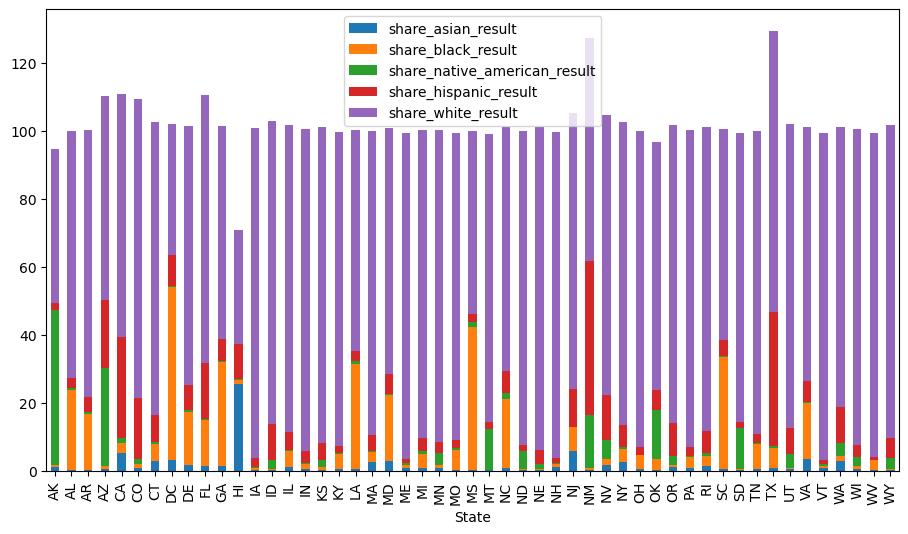

In [412]:
#Bar chart by race per state
df_shares_result.plot.bar(stacked=True, figsize=(11,6))
plt.show();


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [413]:
# First import the dataframe
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [414]:
df_fatalities_race.head()

0       Asian
1       White
2    Hispanic
3       White
4    Hispanic
Name: race, dtype: object

In [415]:
df_fatalities_race.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2535 entries, 0 to 2534
Series name: race
Non-Null Count  Dtype 
--------------  ----- 
2535 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [440]:
df_fatalities_race = pd.DataFrame(df_fatalities_race)
df_fatalities_race

,race
0,Asian
1,White
2,Hispanic
3,White
4,Hispanic
...,...
2530,Unknown
2531,Unknown
2532,Unknown
2533,Black


In [441]:
df_fatalities_race["race"].astype(str)
df_fatalities_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   race    2535 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [458]:
race_counts = df_fatalities_race.value_counts(["race"])
race_counts

race           
White              1201
Black               618
Hispanic            423
Unknown             195
Asian                39
Native_American      31
Other                28
dtype: int64

In [459]:
race_counts = pd.DataFrame(race_counts)
race_counts

,0
race,
White,1201
Black,618
Hispanic,423
Unknown,195
Asian,39
Native_American,31
Other,28


In [460]:
race_counts = race_counts.rename(columns={0: "count"})
race_counts

,count
race,
White,1201
Black,618
Hispanic,423
Unknown,195
Asian,39
Native_American,31
Other,28


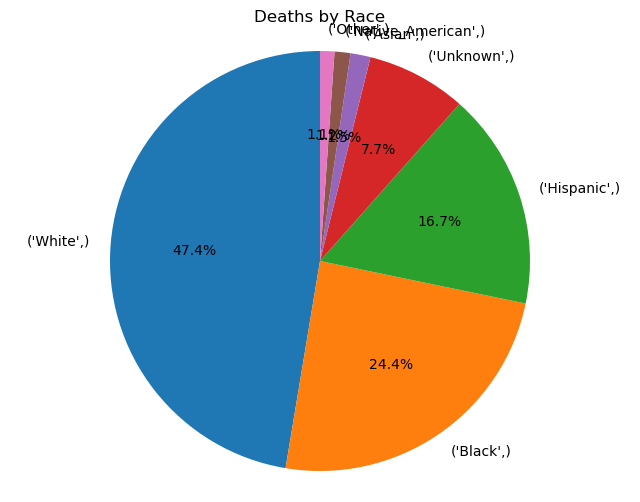

In [464]:
# Create a pie chart
import numpy as np
import matplotlib.pyplot as plt

race_counts = df_fatalities_race.value_counts(["race"])

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Deaths by Race")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show();


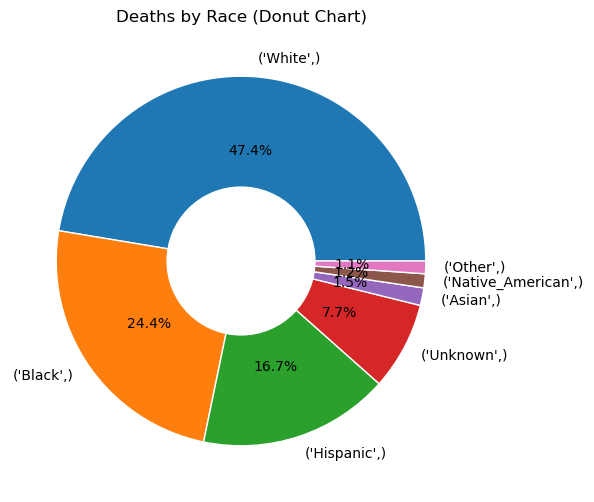

In [476]:
# Create a donut chart
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', wedgeprops={'edgecolor': 'w'})
plt.title('Deaths by Race (Donut Chart)')
circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015


In [478]:
import matplotlib.pyplot as plt
import pandas as pd 

gender = df_fatalities.gender.value_counts()
plt.figure(figsize=(6,4))
fig = px.pie(labels=gender.index, 
             values=gender.values,
             title="Percentage of Male vs. Female People Killed By Police",
             names=gender.index,
             hole=0.4,)
 
fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
 
fig.show()


c:\Users\LauraKhadas\anaconda3\Lib\site-packages\plotly\express\_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 600x400 with 0 Axes>

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [857]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [858]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [859]:
df_fatalities["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

# DELETE THIS
# Compare manner of death by gender
# Need a dataframe with the age, manner of death, and the gender
1. Make a dataframe with only the age, manner of death and the gender by deleting any other columns
2. Make it a pd.DataFrame
3. Correct the headings
4. Look for missing data
5. Make sure the age is an int
6. Create a box plot showing the age and manner of death
7. Create some sort of chart differentiating manner of death and gender

In [845]:
# Compare manner of death by gender
# Need a dataframe with the manner of death and the gender
# Creating a copy
manner_gender_age = df_fatalities
manner_gender_age.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [846]:
# Make a dataframe with only the age, manner of death and the gender by deleting any other columns
manner_gender_age = manner_gender_age.drop(columns=["name", "id", "armed", "race", "city", "state", "signs_of_mental_illness", "threat_level", "flee", "body_camera", "date"])
manner_gender_age.head()


,manner_of_death,age,gender
0,shot,53.0,M
1,shot,47.0,M
2,shot and Tasered,23.0,M
3,shot,32.0,M
4,shot,39.0,M


In [829]:
manner_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manner_of_death  2535 non-null   object 
 1   age              2458 non-null   float64
 2   gender           2535 non-null   object 
dtypes: float64(1), object(2)
memory usage: 59.5+ KB


In [847]:
# Look for missing data
manner_gender_age.isna().sum()

manner_of_death     0
age                77
gender              0
dtype: int64

In [848]:
# I can either delete the lines with missing ages or take the median: Make a decision!
# I have decided to fill the missing ages with the median age.
manner_gender_age["age"] = manner_gender_age["age"].fillna(manner_gender_age["age"].median())
manner_gender_age.isna().sum()

manner_of_death    0
age                0
gender             0
dtype: int64

In [849]:
# Need to change this to a DataFrame
df_manner_gender_age = pd.DataFrame(manner_gender_age)
df_manner_gender_age.head()

,manner_of_death,age,gender
0,shot,53.0,M
1,shot,47.0,M
2,shot and Tasered,23.0,M
3,shot,32.0,M
4,shot,39.0,M


In [851]:
# Make the age an int
df_manner_gender_age["age"] = manner_gender_age["age"].astype(int)
df_manner_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   manner_of_death  2535 non-null   object
 1   age              2535 non-null   int32 
 2   gender           2535 non-null   object
dtypes: int32(1), object(2)
memory usage: 49.6+ KB


6. Create a box plot showing the age and manner of death
7. Create some sort of chart differentiating manner of death and gender

In [852]:
df_manner_gender_age.head()

,manner_of_death,age,gender
0,shot,53,M
1,shot,47,M
2,shot and Tasered,23,M
3,shot,32,M
4,shot,39,M


In [855]:
df_manner_gender_age["manner_of_death"].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [854]:
box = px.box(df_manner_gender_age,
             x="manner_of_death", 
             y="age",
             color="manner_of_death",
             title="Manner of Death vs. Age")
 
box.update_layout(xaxis_title="Manner of Death",
                  yaxis_title="Age",)
box.show()


In [863]:
# Create some sort of chart differentiating manner of death and gender
box = px.box(df_manner_gender_age,
             x="manner_of_death", 
             y="gender",
             color="manner_of_death",
             title="Manner of Death vs. Gender")
 
box.update_layout(xaxis_title="Manner of Death",
                  yaxis_title="Gender",)
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [481]:
# First import the dataframe
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [482]:
# Create a dataframe of just armed
armed = df_fatalities["armed"]
armed

0              gun
1              gun
2          unarmed
3       toy weapon
4         nail gun
           ...    
2530           gun
2531       vehicle
2532           gun
2533       vehicle
2534         knife
Name: armed, Length: 2535, dtype: object

In [483]:
armed.isna().sum()

9

In [486]:
armed.fillna("unarmed")

0              gun
1              gun
2          unarmed
3       toy weapon
4         nail gun
           ...    
2530           gun
2531       vehicle
2532           gun
2533       vehicle
2534         knife
Name: armed, Length: 2535, dtype: object

In [487]:
armed.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2535 entries, 0 to 2534
Series name: armed
Non-Null Count  Dtype 
--------------  ----- 
2526 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [488]:
armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [489]:
df_armed = pd.DataFrame(armed)
df_armed.head()

,armed
0,gun
1,gun
2,unarmed
3,toy weapon
4,nail gun


In [495]:
# Group by the type of weapon
df_armed_by = df_armed.value_counts("armed")
df_armed_by.head()

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
dtype: int64

In [496]:
df_armed_by = pd.DataFrame(df_armed_by)
df_armed_by

,0
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
bayonet,1
hand torch,1
metal hand tool,1


In [503]:
df_armed_by.rename(columns={0: "counts"}, inplace=True)
df_armed_by.head()

,counts
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117


In [508]:
df_armed_by = pd.DataFrame(df_armed_by)
df_armed_by.head()

,counts
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117


AttributeError: module 'matplotlib' has no attribute 'show'

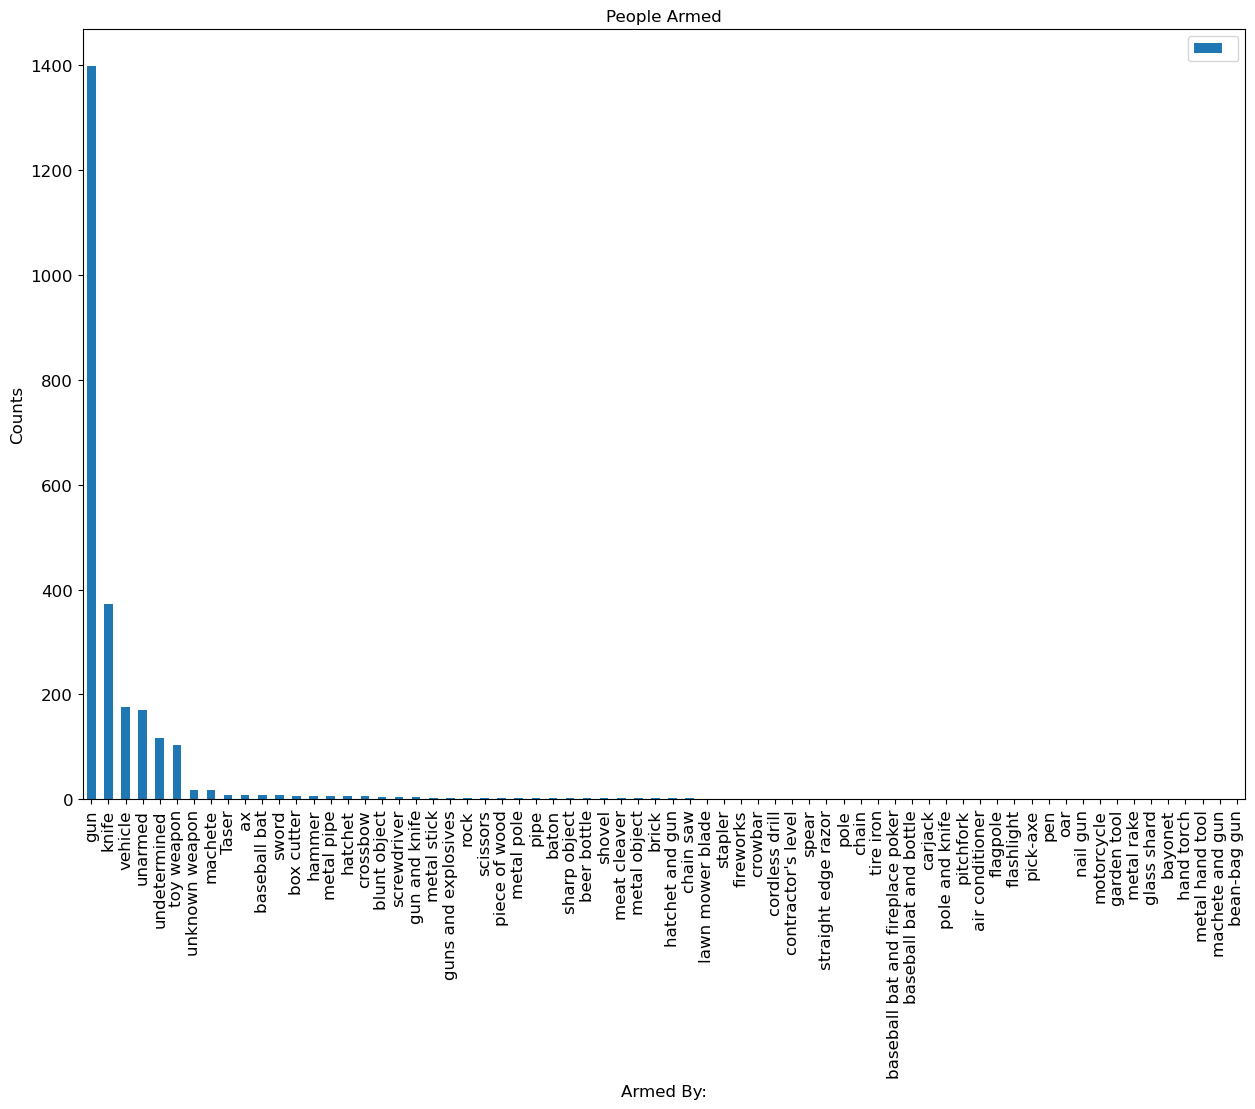

In [515]:
# Chart with kind of weapon by group
import pandas as pd
import matplotlib as plt
df_armed_by = df_armed.value_counts("armed")

ax = df_armed_by.plot(kind='bar', title ="People Armed", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Armed By:", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
plt.show();

In [516]:
# % of Armed People vs. the total
df_armed_by.head()

armed
gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
dtype: int64

In [517]:
df_armed_by = pd.DataFrame(df_armed_by)
df_armed_by.head()

,0
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117


In [518]:
df_armed_by.rename(columns={0: "counts"}, inplace=True)
df_armed_by.head()

,counts
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117


In [535]:
df_armed_by

,counts
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
bayonet,1
hand torch,1
metal hand tool,1


In [542]:
df_armed_unarmed = pd.DataFrame({"armed": ["gun", "unarmed"], "counts": [1398, 171]})
df_armed_unarmed

,armed,counts
0,gun,1398
1,unarmed,171


## The count of people armed with guns is 1398.

## The count of unarmed people is 171, not including the count of undetermined, which is 117.

AttributeError: module 'matplotlib' has no attribute '_xlabel'

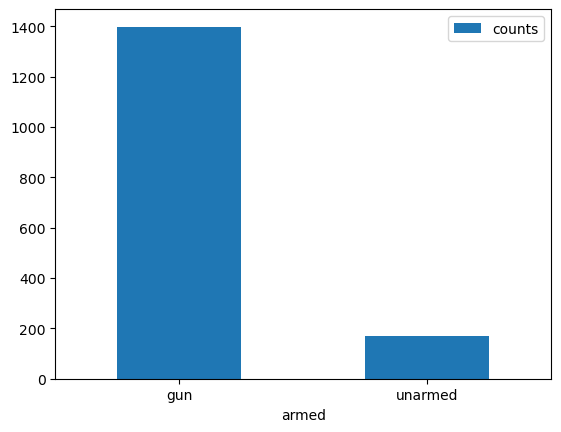

In [550]:
# Chart the armed with guns dataframe vs. the unarmed dataframe
import pandas as pd
import matplotlib as plt


ax=df_armed_unarmed.plot.bar(x="armed", y="counts", rot=0)

plt._xlabel("Gun")
plt.ylabel("Unarmed")
plt.title("Armed vs. Unarmed")

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,2015


In [ ]:
fatalities_age = df_fatalities["age"]
fatalities_age

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2530   31.00
2531     NaN
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2535, dtype: float64

In [ ]:
fatalities_age.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531     True
2532    False
2533    False
2534    False
Name: age, Length: 2535, dtype: bool

In [ ]:
fatalities_age.dropna()

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2529   32.00
2530   31.00
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2458, dtype: float64

In [ ]:
fatalities_age.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531     True
2532    False
2533    False
2534    False
Name: age, Length: 2535, dtype: bool

In [ ]:
fatalities_age_under_25 = fatalities_age < 25
fatalities_age_under_25

0       False
1       False
2        True
3       False
4       False
        ...  
2530    False
2531    False
2532    False
2533    False
2534    False
Name: age, Length: 2535, dtype: bool

In [ ]:
#This counts the number of True values in the column
fatalities_age_under_25.value_counts()

age
False    2085
True      450
Name: count, dtype: int64

So, the number of people killed under 25 is 450. 

In [ ]:

# Percentage of people killed under 25 of the total number of people killed
print(f"The percent of people under 25 killed by police is {(450/2534)*100:2f}%")

The percent of people under 25 killed by police is 17.758485%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

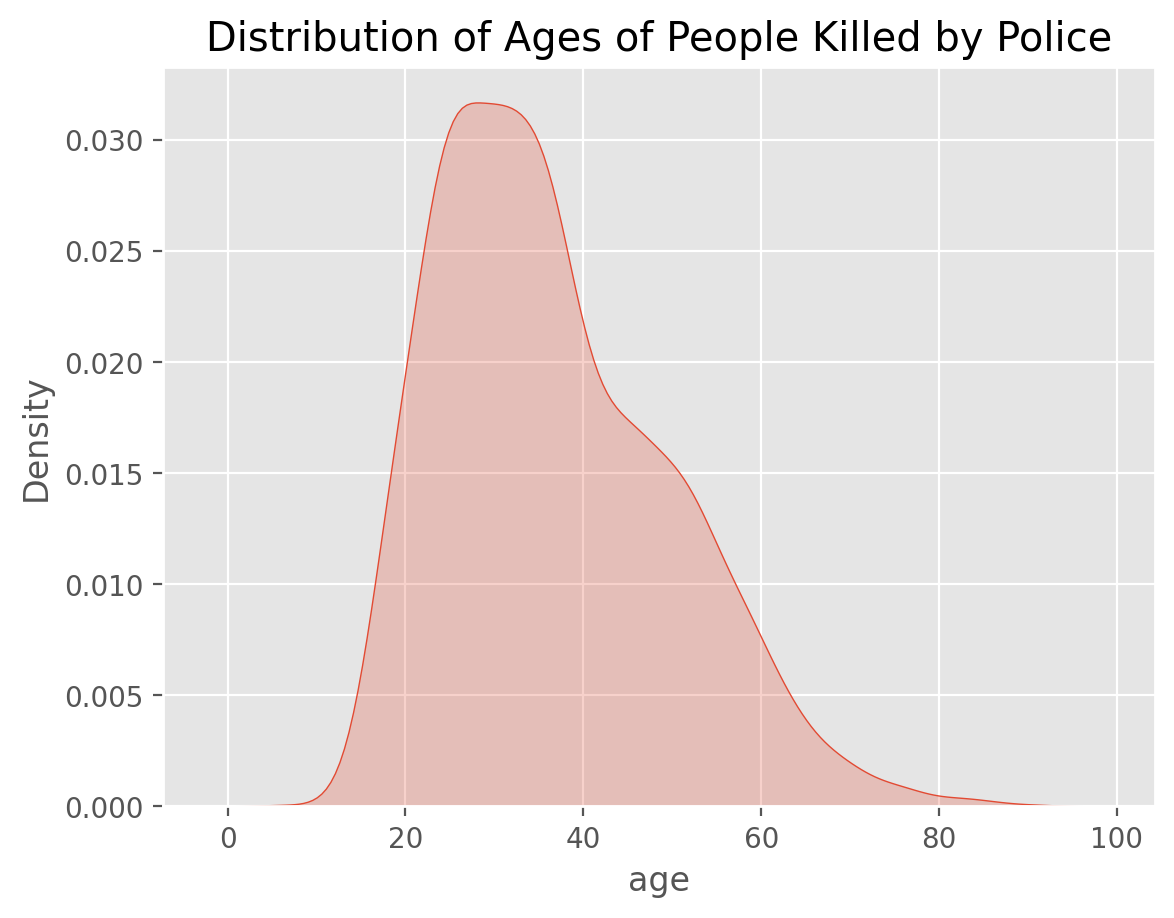

In [ ]:
# Distribution of ages of people killed by police
# Histogram and KDE plot


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


plt.figure(dpi=200)
age = df_fatalities["age"]
sns.kdeplot(age, fill=True)
plt.title("Distribution of Ages of People Killed by Police")
plt.show()

Create a separate KDE plot for each race. Is there a difference between the distributions? 

In [251]:
#Dataframe for each race
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [252]:
df_fatalities_race = df_fatalities['race']
df_fatalities_race

0          Asian
1          White
2       Hispanic
3          White
4       Hispanic
          ...   
2530     Unknown
2531     Unknown
2532     Unknown
2533       Black
2534       Black
Name: race, Length: 2535, dtype: object

In [ ]:
df_fatalities_race = df_fatalities_race.fillna("Unknown")
df_fatalities_race.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531    False
2532    False
2533    False
2534    False
Name: race, Length: 2535, dtype: bool

In [552]:
df_fatalities_race.head()

,race
0,Asian
1,White
2,Hispanic
3,White
4,Hispanic


Create a separate KDE plot for each race. Is there a difference between the distributions? 

<Axes: >

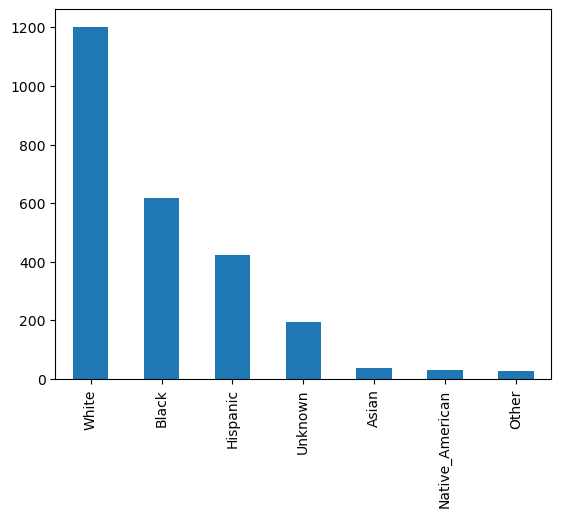

In [553]:
# Get the value_counts of each race
df_fatalities_race['race'].value_counts().plot(kind="bar")


<Axes: xlabel='race', ylabel='Density'>

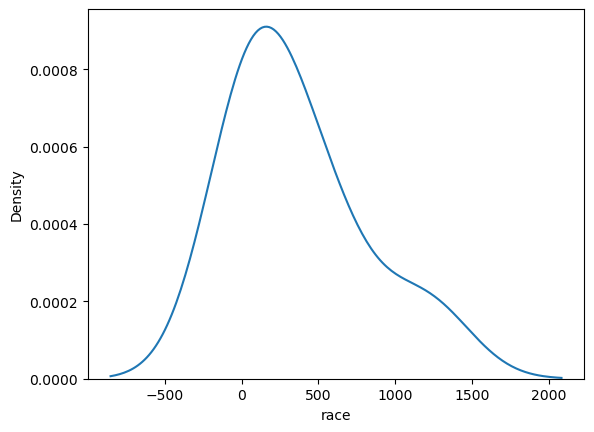

In [554]:
# Make a KDE plot
import pandas as pd
import seaborn as sns

# Get the value_counts of each race
data = df_fatalities_race['race'].value_counts()
sns.kdeplot(data)


In [567]:
fatalities_race = df_fatalities_race['race'].value_counts()
fatalities_race

White              1201
Black               618
Hispanic            423
Unknown             195
Asian                39
Native_American      31
Other                28
Name: race, dtype: int64

In [568]:
fatalities_race = pd.DataFrame(fatalities_race)
fatalities_race

,race
White,1201
Black,618
Hispanic,423
Unknown,195
Asian,39
Native_American,31
Other,28


In [569]:
fatalities_race.rename(columns={"race": "count"}, inplace=True)
fatalities_race

,count
White,1201
Black,618
Hispanic,423
Unknown,195
Asian,39
Native_American,31
Other,28


In [570]:
fatalities_race = pd.DataFrame(fatalities_race)
fatalities_race

,count
White,1201
Black,618
Hispanic,423
Unknown,195
Asian,39
Native_American,31
Other,28


In [578]:
fatalities_race["race"] = ["White", "Black", "Hispanic", "Unknown", "Asian", "Native American", "Other"]
fatalities_race

,count,race
White,1201,White
Black,618,Black
Hispanic,423,Hispanic
Unknown,195,Unknown
Asian,39,Asian
Native_American,31,Native American
Other,28,Other


c:\Users\LauraKhadas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



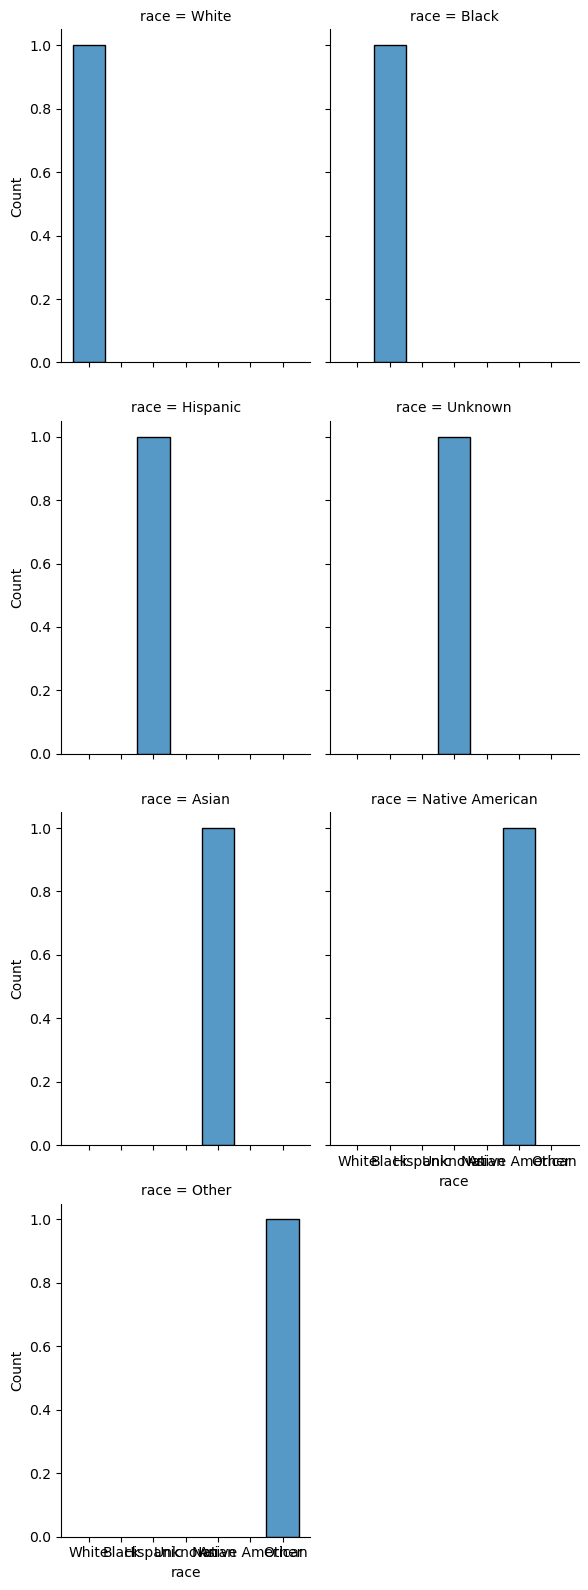

In [585]:
# Separate KDE plots
# Use this: https://www.statology.org/seaborn-multiple-plots/ 
import pandas as pd
import seaborn as sns

#data = df_fatalities_race['race'].value_counts()
data = fatalities_race
#define grid
g = sns.FacetGrid(data=data, col='race', col_wrap=2, height=4, aspect=.75)

#add histograms to each plot
g.map(sns.histplot, 'race')

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [225]:
df_fatalities_race = df_fatalities
df_fatalities_race.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [227]:
#First, change the race column to A to Asian, W to White, H to Hispanic, and B to Black
df_fatalities_race["race"] = df_fatalities_race["race"].replace("A", "Asian")
df_fatalities_race.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [228]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace("W", "White")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [229]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace("H", "Hispanic")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [230]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace("B", "Black")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True


In [232]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace("0", "Unknown")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True


In [240]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace(0, "Unknown")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,Unknown,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,Unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True


In [234]:
df_fatalities_race["race"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2530     True
2531     True
2532     True
2533    False
2534    False
Name: race, Length: 2535, dtype: bool

In [237]:
#Then change the NaN values to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].fillna("Unknown")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,Unknown,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,Unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True


In [242]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace("O", "Other")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,Unknown,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,Unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True


In [244]:
#Then change the zeros to "Unknown"
df_fatalities_race["race"] = df_fatalities_race["race"].replace("N", "Native_American")
df_fatalities_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,Unknown,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,Unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Black,Oshkosh,WI,False,attack,Car,True


In [245]:
race_totals = df_fatalities_race.value_counts(df_fatalities_race["race"])
race_totals

race
White              1201
Black               618
Hispanic            423
Unknown             195
Asian                39
Native_American      31
Other                28
dtype: int64

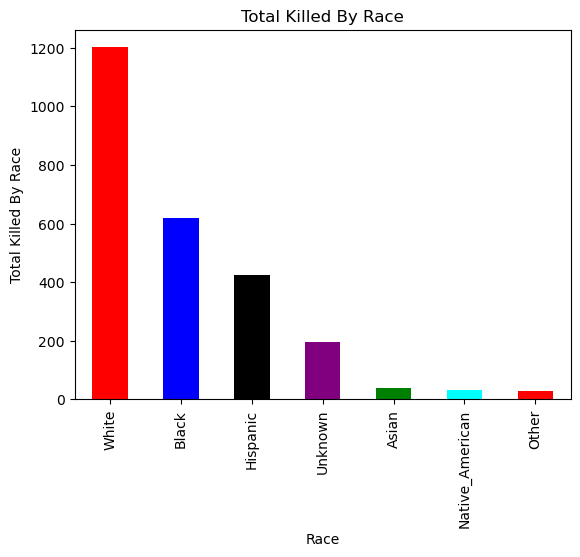

In [248]:
race_totals.plot(kind="bar", color=["red", "blue", "black", "purple", "green", "cyan"])
plt.xlabel("Race")
plt.ylabel("Total Killed By Race")
plt.title("Total Killed By Race")
plt.show();

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
# Dataframe of # of people diagnosed with a mental illness
mental_illness = df_fatalities.value_counts(df_fatalities["signs_of_mental_illness"])
mental_illness

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

In [ ]:
# Divide the number of true by the number of false
print(f"The percentage of people killed who were showing signs of mental illness were: {((633/1902)*100):.2f}%")

The percentage of people killed who were showing signs of mental illness were: 33.28%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [31]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [67]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [76]:
city_counts = df_fatalities['city'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
city_counts

,City,Count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
...,...,...
1412,Columbia Heights,1
1413,Ozark,1
1414,Lampe,1
1415,Seagoville,1


In [77]:
city_counts.head(10)

,City,Count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [78]:
deaths_by_city = city_counts.head(10)
deaths_by_city

,City,Count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


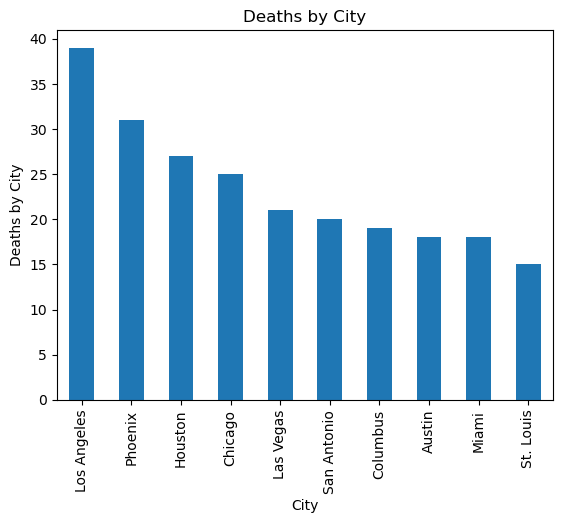

In [79]:
import matplotlib.pyplot as plt

deaths_by_city.plot(kind='bar', x='City', y='Count', legend=False)
plt.xlabel('City')
plt.ylabel('Deaths by City')
plt.title('Deaths by City')
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [80]:
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [84]:
# These are the top 10 cities from the deaths_by_city dataframe using the same format as the df_share_race_city dataframe
needed_cities = ["Los Angeles city", "Phoenix city", "Houston city", "Chicago city", "Las Vegas city", "San Antonio city", "Columbus city", "Austin city", "Miami city", "St. Louis city"] 
needed_cities

['Los Angeles city',
 'Phoenix city',
 'Houston city',
 'Chicago city',
 'Las Vegas city',
 'San Antonio city',
 'Columbus city',
 'Austin city',
 'Miami city',
 'St. Louis city']

In [85]:
# Filtering only for the needed cities
filtered_cities = df_share_race_city[df_share_race_city["City"].isin(needed_cities)]
filtered_cities

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
712,AK,Houston city,82.2,0.4,6.7,0.6,3.3
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
1404,AR,Austin city,94.2,2,0.3,0.4,4.3
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
4847,FL,San Antonio city,96.5,1.1,0,0.4,6.1
5173,GA,Columbus city,46.3,45.5,0.4,2.2,6.4
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
7442,IN,Austin city,97.1,0.3,0.3,0.2,2.1
7533,IN,Columbus city,86.9,2.7,0.2,5.6,5.8


In [87]:
filtered_cities = filtered_cities.rename(columns={"Geographic area":"State"})
filtered_cities

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
712,AK,Houston city,82.2,0.4,6.7,0.6,3.3
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
1404,AR,Austin city,94.2,2,0.3,0.4,4.3
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
4847,FL,San Antonio city,96.5,1.1,0,0.4,6.1
5173,GA,Columbus city,46.3,45.5,0.4,2.2,6.4
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
7442,IN,Austin city,97.1,0.3,0.3,0.2,2.1
7533,IN,Columbus city,86.9,2.7,0.2,5.6,5.8


In [93]:
needed_states = ["CA", "AZ", "TX", "IL", "NV", "OH", "FL", "MO" ]
needed_states


['CA', 'AZ', 'TX', 'IL', 'NV', 'OH', 'FL', 'MO']

In [96]:
# Clean the data 
df_filtered_cities = filtered_cities[filtered_cities["State"].isin(needed_states)]
df_filtered_cities

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
4847,FL,San Antonio city,96.5,1.1,0,0.4,6.1
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14076,MO,Houston city,96.3,0.2,0.6,0.4,1.2
14248,MO,Miami city,97.7,0.6,0,0,1.7
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6


In [132]:
# Still have to delete Miami city, TX 
# Specify the city and state to delete

# Delete the row
city_state = df_filtered_cities[~((df_filtered_cities['City'] == "Miami city") & (df_filtered_cities['State'] == "TX"))]
city_state

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
4847,FL,San Antonio city,96.5,1.1,0,0.4,6.1
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14076,MO,Houston city,96.3,0.2,0.6,0.4,1.2
14248,MO,Miami city,97.7,0.6,0,0,1.7
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6


In [138]:
# Still have to delete San Antonio city, FL 
# Specify the city and state to delete

# Delete the row
city_state_1 = city_state[~((city_state['City'] == "San Antonio city") & (city_state['State'] == "FL"))]
city_state_1

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14076,MO,Houston city,96.3,0.2,0.6,0.4,1.2
14248,MO,Miami city,97.7,0.6,0,0,1.7
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6
24543,TX,Austin city,68.3,8.1,0.9,6.3,35.1


In [141]:
# Still have to delete Houston city, MO
# Specify the city and state to delete

# Delete the row
city_state_2 = city_state_1[~((city_state_1['City'] == "Houston city") & (city_state_1['State'] == "MO"))]
city_state_2

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14248,MO,Miami city,97.7,0.6,0,0,1.7
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6
24543,TX,Austin city,68.3,8.1,0.9,6.3,35.1
24778,TX,Columbus city,69,17.9,0.6,0.5,24.3


In [142]:
# Still have to delete Miami city, MO
# Specify the city and state to delete

# Delete the row
city_state_3 = city_state_2[~((city_state_2['City'] == "Miami city") & (city_state_2['State'] == "MO"))]
city_state_3

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6
24543,TX,Austin city,68.3,8.1,0.9,6.3,35.1
24778,TX,Columbus city,69,17.9,0.6,0.5,24.3
25157,TX,Houston city,50.5,23.7,0.7,6,43.8


In [143]:
# Still have to delete Columbus city, TX
# Specify the city and state to delete

# Delete the row
city_state_4 = city_state_3[~((city_state_3['City'] == "Columbus city") & (city_state_3['State'] == "TX"))]
city_state_4

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6
24543,TX,Austin city,68.3,8.1,0.9,6.3,35.1
25157,TX,Houston city,50.5,23.7,0.7,6,43.8
25872,TX,San Antonio city,72.6,6.9,0.9,2.4,63.2


In [144]:
city_state_race = city_state_4
city_state_race

,State,City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix city,65.9,6.5,2.2,3.2,40.8
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5
4633,FL,Miami city,72.6,19.2,0.3,1,70
6278,IL,Chicago city,45,32.9,0.5,5.5,28.9
14472,MO,St. Louis city,43.9,49.2,0.3,2.9,3.5
15666,NV,Las Vegas city,62.1,11.1,0.7,6.1,31.5
19379,OH,Columbus city,61.5,28,0.3,4.1,5.6
24543,TX,Austin city,68.3,8.1,0.9,6.3,35.1
25157,TX,Houston city,50.5,23.7,0.7,6,43.8
25872,TX,San Antonio city,72.6,6.9,0.9,2.4,63.2


Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [147]:
city_state_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1201 to 25872
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  10 non-null     object
 1   City                   10 non-null     object
 2   share_white            10 non-null     object
 3   share_black            10 non-null     object
 4   share_native_american  10 non-null     object
 5   share_asian            10 non-null     object
 6   share_hispanic         10 non-null     object
dtypes: object(7)
memory usage: 640.0+ bytes


In [152]:
city_state_race["share_white"] = city_state_race["share_white"].astype(float)
city_state_race["share_black"] = city_state_race["share_black"].astype(float)
city_state_race["share_native_american"] = city_state_race["share_native_american"].astype(float)
city_state_race["share_asian"] = city_state_race["share_asian"].astype(float)
city_state_race["share_hispanic"] = city_state_race["share_hispanic"].astype(float)
city_state_race.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1201 to 25872
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  10 non-null     object 
 1   City                   10 non-null     object 
 2   share_white            10 non-null     float64
 3   share_black            10 non-null     float64
 4   share_native_american  10 non-null     float64
 5   share_asian            10 non-null     float64
 6   share_hispanic         10 non-null     float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_22264\749611749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_state_race["share_white"] = city_state_race["share_white"].astype(float)
C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_22264\749611749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_state_race["share_black"] = city_state_race["share_black"].astype(float)
C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_22264\749611749.py:3: SettingWithCopyWarning: 
A value is trying to be

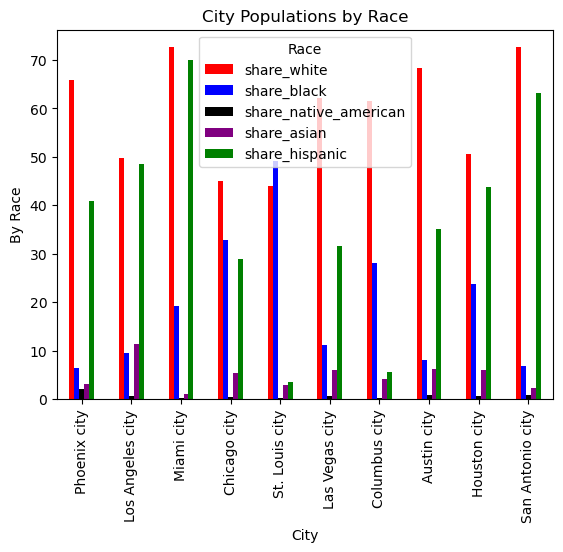

In [155]:
city_state_race.plot(x="City", y=["share_white", "share_black", "share_native_american", "share_asian","share_hispanic"],
                     kind="bar", color=["red", "blue", "black", "purple", "green"])
plt.xlabel("City")
plt.ylabel("By Race")
plt.title("City Populations by Race")
plt.legend(title="Race")
plt.show();

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [158]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [159]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [173]:
df_fatalities_state = df_fatalities[["state"]]
df_fatalities_state

,state
0,WA
1,OR
2,KS
3,CA
4,CO
...,...
2530,MO
2531,NM
2532,ID
2533,WI


In [178]:
df_fatalities_state_counts = df_fatalities_state["state"].value_counts().reset_index()
df_fatalities_state_counts.head()

,index,state
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79


In [179]:
df_fatalities_state_counts = df_fatalities_state_counts.rename(columns={"index": "State", "state": "Count"})
df_fatalities_state_counts.head()


,State,Count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79


In [183]:
# A Chloropeth Map of Police Killings by US State
import pandas as pd
import plotly.express as px

data = df_fatalities_state_counts

fig = px.choropleth(data, locations="State", locationmode="USA-states", color="Count", scope="usa")
fig.show();

Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [185]:
df_pct_poverty_state = df_pct_poverty.rename(columns = {"Geographic Area": "State"})
df_pct_poverty_state.head()

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [592]:
df_pct_poverty_state = pd.DataFrame(df_pct_poverty_state)
df_pct_poverty_state 

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [603]:
poverty_state = df_pct_poverty_state
poverty_state.head()

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [606]:
poverty_state = pd.DataFrame(poverty_state)
poverty_state

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [609]:
# This makes the poverty rate a float so it can be added
poverty_state["poverty_rate"] = pd.to_numeric(poverty_state["poverty_rate"], errors="coerce")
poverty_state.head()

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [611]:
poverty_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         29329 non-null  object 
 1   City          29329 non-null  object 
 2   poverty_rate  29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [614]:
grouped_df = poverty_state.groupby("State")
grouped_df.head()

,State,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0
...,...,...,...
29125,WY,Afton town,8.2
29126,WY,Albany CDP,0.0
29127,WY,Albin town,29.6
29128,WY,Alcova CDP,NaN


In [619]:
# Checking for null values
poverty_state.isna().sum()

State             0
City              0
poverty_rate    201
dtype: int64

In [623]:
# Get the poverty rate sum for each state
state_poverty_sum = poverty_state.groupby('State')['poverty_rate'].sum()
state_poverty_sum.head()

State
AK     6630.9
AL    12057.9
AR    12423.1
AZ    11395.9
CA    25704.1
Name: poverty_rate, dtype: float64

In [646]:
# Get the poverty rate sum for each state
state_poverty_sum = pd.DataFrame(state_poverty_sum).reset_index()
state_poverty_sum.head()

,State,poverty_rate
0,AK,6630.9
1,AL,12057.9
2,AR,12423.1
3,AZ,11395.9
4,CA,25704.1


In [643]:
# Getting the state counts
state_poverty = poverty_state["State"].value_counts().reset_index()
state_poverty.head()

,index,State
0,PA,1762
1,TX,1747
2,CA,1522
3,IL,1368
4,OH,1215


In [645]:
state_poverty.rename(columns={"State": "Count", "index": "State"}, inplace=True)
state_poverty.head()

,State,Count
0,PA,1762
1,TX,1747
2,CA,1522
3,IL,1368
4,OH,1215


In [650]:
# These are the number of unique cities by state
city_counts_poverty = grouped_df["City"].nunique()
city_counts_poverty.head()

State
AK     355
AL     585
AR     541
AZ     451
CA    1522
Name: City, dtype: int64

In [651]:
# Merge city_counts and state_poverty_sum
total_poverty_rates = (pd.merge(state_poverty_sum, city_counts_poverty, on="State"))
total_poverty_rates.head()

,State,poverty_rate,City
0,AK,6630.9,355
1,AL,12057.9,585
2,AR,12423.1,541
3,AZ,11395.9,451
4,CA,25704.1,1522


In [652]:
total_poverty_rates["Poverty_Rates"] = total_poverty_rates["poverty_rate"] / total_poverty_rates["City"]
total_poverty_rates.head()

,State,poverty_rate,City,Poverty_Rates
0,AK,6630.9,355,18.678592
1,AL,12057.9,585,20.611795
2,AR,12423.1,541,22.963216
3,AZ,11395.9,451,25.268071
4,CA,25704.1,1522,16.888371


In [654]:
only_poverty_rates = total_poverty_rates.drop(columns=["poverty_rate", "City"])
only_poverty_rates.head()

,State,Poverty_Rates
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371


In [655]:
# A Chloropeth Map of Police Killings by US State
import pandas as pd
import plotly.express as px

data = df_fatalities_state_counts

fig = px.choropleth(data, locations="State", locationmode="USA-states", color="Count", scope="usa")
fig.show();

In [657]:
#A Chloropeth of Cities With A High Degree of Poverty
import pandas as pd
import plotly.express as px

data = only_poverty_rates

fig = px.choropleth(data, locations="State", locationmode="USA-states", color="Poverty_Rates", scope="usa")
fig.show();

# Number of Police Killings Over Time

Analyze the Number of Police Killings over Time. Is there a trend in the data? 

In [265]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [266]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [277]:
df_fatalities.shape

(2535, 15)

In [267]:
#First add a year column
df_fatalities["year"] = pd.to_datetime(df_fatalities['date'], errors='coerce').dt.year
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015


In [278]:
df_fatalities.shape

(2535, 15)

In [309]:
year_fatalities = df_fatalities["year"].value_counts()
year_fatalities

2015    991
2016    963
2017    581
Name: year, dtype: int64

In [311]:
year_fatalities.info()

<class 'pandas.core.series.Series'>
Int64Index: 3 entries, 2015 to 2017
Series name: year
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


In [321]:
year_fatalities = pd.DataFrame(year_fatalities)
year_fatalities

,year
2015,991
2016,963
2017,581


In [332]:
year_fatalities.rename(columns={"year": "count"}, inplace=True)
year_fatalities

,count
2015,991
2016,963
2017,581


In [333]:
fatalities_year = year_fatalities.assign(years = [2015, 2016, 2017])
fatalities_year

,count,years
2015,991,2015
2016,963,2016
2017,581,2017


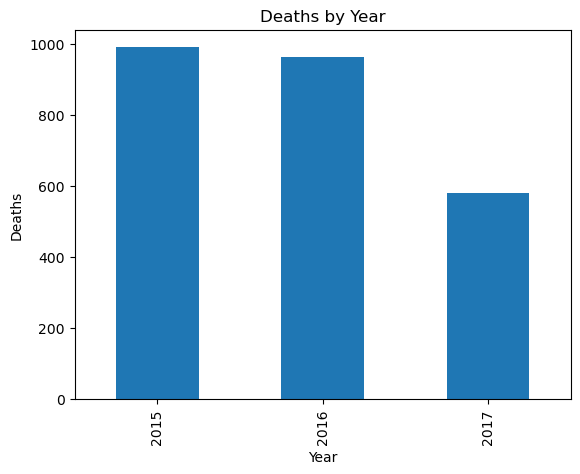

In [334]:
# Number of Police Killings Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Plotting a basic bar graph
fatalities_year.plot(kind="bar", x="years", y="count", legend = False)

plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Deaths by Year')
plt.show();

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).